In [67]:
!pip install -r requirements.txt

In [68]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [69]:
# load the data and asplit the data into train/test sets

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

X_train = X_train_orig/255
X_test = X_test_orig/255

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


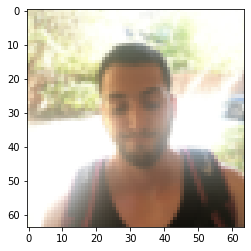

In [70]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [71]:
# The sequential API
# Create the sequential model

def happyModel():
    model = tf.keras.Sequential([
            tfl.ZeroPadding2D(padding=3, input_shape=(64,64,3)),
            tfl.Conv2D(32,(7,7),strides=1),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(1,activation='sigmoid')
    ])
    return model

In [72]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [73]:
# Compile the model for training with an optimizer and loss

happy_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [74]:
happy_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_5 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_11 (ReLU)             (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                      

In [75]:
# Train and evaluate the model

happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 53ms/step - loss: 1.5388 - accuracy: 0.6717
Epoch 2/10
38/38 [==============================] - 2s 49ms/step - loss: 0.2518 - accuracy: 0.8983
Epoch 3/10
38/38 [==============================] - 2s 55ms/step - loss: 0.1488 - accuracy: 0.9383
Epoch 4/10
38/38 [==============================] - 2s 53ms/step - loss: 0.1031 - accuracy: 0.9617
Epoch 5/10
38/38 [==============================] - 2s 50ms/step - loss: 0.1309 - accuracy: 0.9567
Epoch 6/10
38/38 [==============================] - 2s 50ms/step - loss: 0.0900 - accuracy: 0.9683
Epoch 7/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1119 - accuracy: 0.9600
Epoch 8/10
38/38 [==============================] - 2s 46ms/step - loss: 0.1473 - accuracy: 0.9483
Epoch 9/10
38/38 [==============================] - 2s 48ms/step - loss: 0.1084 - accuracy: 0.9667
Epoch 10/10
38/38 [==============================] - 2s 46ms/step - loss: 0.1006 - accuracy: 0.9633


In [76]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 19ms/step - loss: 0.1261 - accuracy: 0.9600


[0.12606181204319, 0.9599999785423279]

In [77]:
# The function API
# Load the SIGNS Dataset

X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y=1


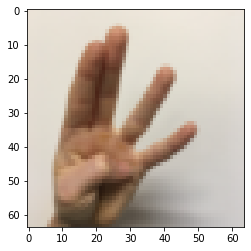

In [78]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print('y=' + str(np.squeeze(Y_test_orig[:, index])))

In [79]:
# Split the data into train/test sets

X_train = X_train_orig/255
X_test = X_test_orig/255
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [80]:
# Forward propagation
# Convolutional model

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8, (4,4), strides=1, padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8,8), strides=8, padding='same')(A1)
    Z2 = tfl.Conv2D(16, (2,2), strides=1, padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4,4), strides=4, padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model


In [81]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 re_lu_12 (ReLU)             (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          528       
                                                                 
 re_lu_13 (ReLU)             (None, 8, 8, 16)          0         
                                                           

In [82]:
# Train the model
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataeset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataeset)

Epoch 1/100
17/17 [==============================] - 1s 52ms/step - loss: 1.8152 - accuracy: 0.1639 - val_loss: 1.7944 - val_accuracy: 0.1833
Epoch 2/100
17/17 [==============================] - 1s 40ms/step - loss: 1.7897 - accuracy: 0.2194 - val_loss: 1.7861 - val_accuracy: 0.2333
Epoch 3/100
17/17 [==============================] - 1s 43ms/step - loss: 1.7841 - accuracy: 0.2444 - val_loss: 1.7816 - val_accuracy: 0.2167
Epoch 4/100
17/17 [==============================] - 1s 41ms/step - loss: 1.7772 - accuracy: 0.2500 - val_loss: 1.7766 - val_accuracy: 0.2500
Epoch 5/100
17/17 [==============================] - 1s 36ms/step - loss: 1.7718 - accuracy: 0.2833 - val_loss: 1.7714 - val_accuracy: 0.3083
Epoch 6/100
17/17 [==============================] - 1s 42ms/step - loss: 1.7640 - accuracy: 0.3176 - val_loss: 1.7642 - val_accuracy: 0.3667
Epoch 7/100
17/17 [==============================] - 1s 40ms/step - loss: 1.7527 - accuracy: 0.3398 - val_loss: 1.7528 - val_accuracy: 0.3500
Epoch 

In [83]:
# History object

history.history

{'loss': [1.815171480178833,
  1.789691686630249,
  1.7840911149978638,
  1.777240514755249,
  1.7717944383621216,
  1.76399827003479,
  1.7527432441711426,
  1.7378971576690674,
  1.7212477922439575,
  1.7023106813430786,
  1.6814371347427368,
  1.6567203998565674,
  1.6277086734771729,
  1.5911345481872559,
  1.5505515336990356,
  1.5082316398620605,
  1.4615588188171387,
  1.413177728652954,
  1.3677059412002563,
  1.3257768154144287,
  1.2849609851837158,
  1.245599389076233,
  1.2090528011322021,
  1.1743354797363281,
  1.1416199207305908,
  1.1095941066741943,
  1.0807498693466187,
  1.0513883829116821,
  1.026849627494812,
  1.0012415647506714,
  0.9793924689292908,
  0.9562317728996277,
  0.9366884231567383,
  0.9153825044631958,
  0.8985517621040344,
  0.8816980123519897,
  0.8637565970420837,
  0.8475324511528015,
  0.8315194845199585,
  0.815580427646637,
  0.8008779287338257,
  0.7875279188156128,
  0.7734639048576355,
  0.7600361704826355,
  0.7469964027404785,
  0.7343742

In [84]:
# The history.history['loss'] entry is a dictionary with as many values as epochs that the model was trained on.

df_loss_acc = pd.DataFrame(history.history)
df_loss_acc


,loss,accuracy,val_loss,val_accuracy
0,1.815171,0.163889,1.794376,0.183333
1,1.789692,0.219444,1.786059,0.233333
2,1.784091,0.244444,1.781612,0.216667
3,1.777241,0.250000,1.776569,0.250000
4,1.771794,0.283333,1.771440,0.308333
...,...,...,...,...
95,0.403200,0.882407,0.523674,0.833333
96,0.399190,0.884259,0.521425,0.833333
97,0.395399,0.885185,0.518683,0.833333
98,0.391870,0.889815,0.517125,0.833333


/var/folders/1d/kh7qkkz51_l7kldg3_tc40rw0000gn/T/ipykernel_4579/2715891956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/1d/kh7qkkz51_l7kldg3_tc40rw0000gn/T/ipykernel_4579/2715891956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

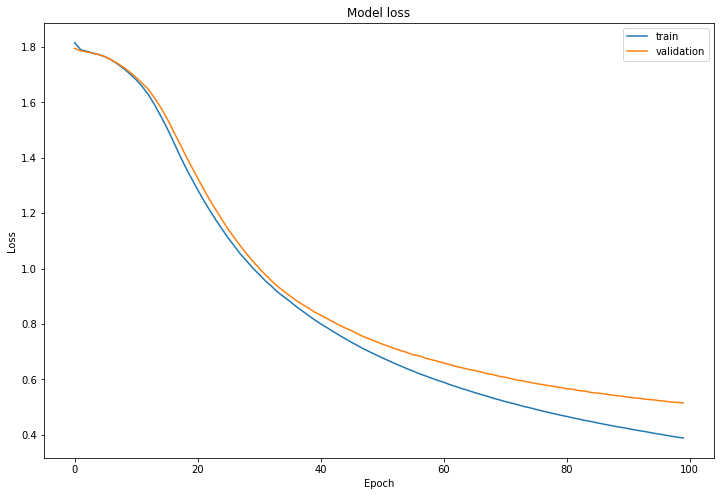

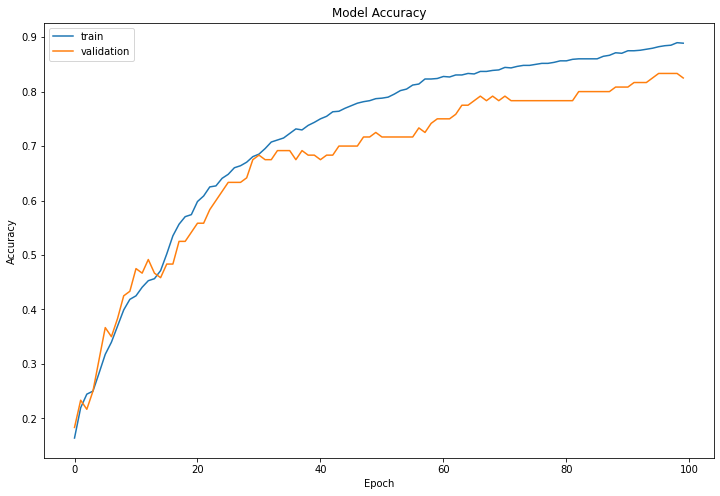

In [85]:
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')